In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/giovani/Dropbox/rhenium/rhenium_EOS/matplotlib-quattrocento.mplstyle')

In [3]:
folders = ['10_90', '20_80', '30_70', '40_60', '50_50', '60_40', '70_30']

DOS = []
max_freq = 200

for folder in folders:
    files_list = !ls ./sp2/$folder/
    sum_dos = 0
    count = 0
    for f in files_list:
        f,dos = np.loadtxt(f'./sp2/{folder}/{f}',unpack=True)
        f = f[:int(max_freq*2)]
        dos = dos[:int(max_freq*2)]
        sum_dos = sum_dos + dos
        count += 1
    
    DOS.append(sum_dos/count)

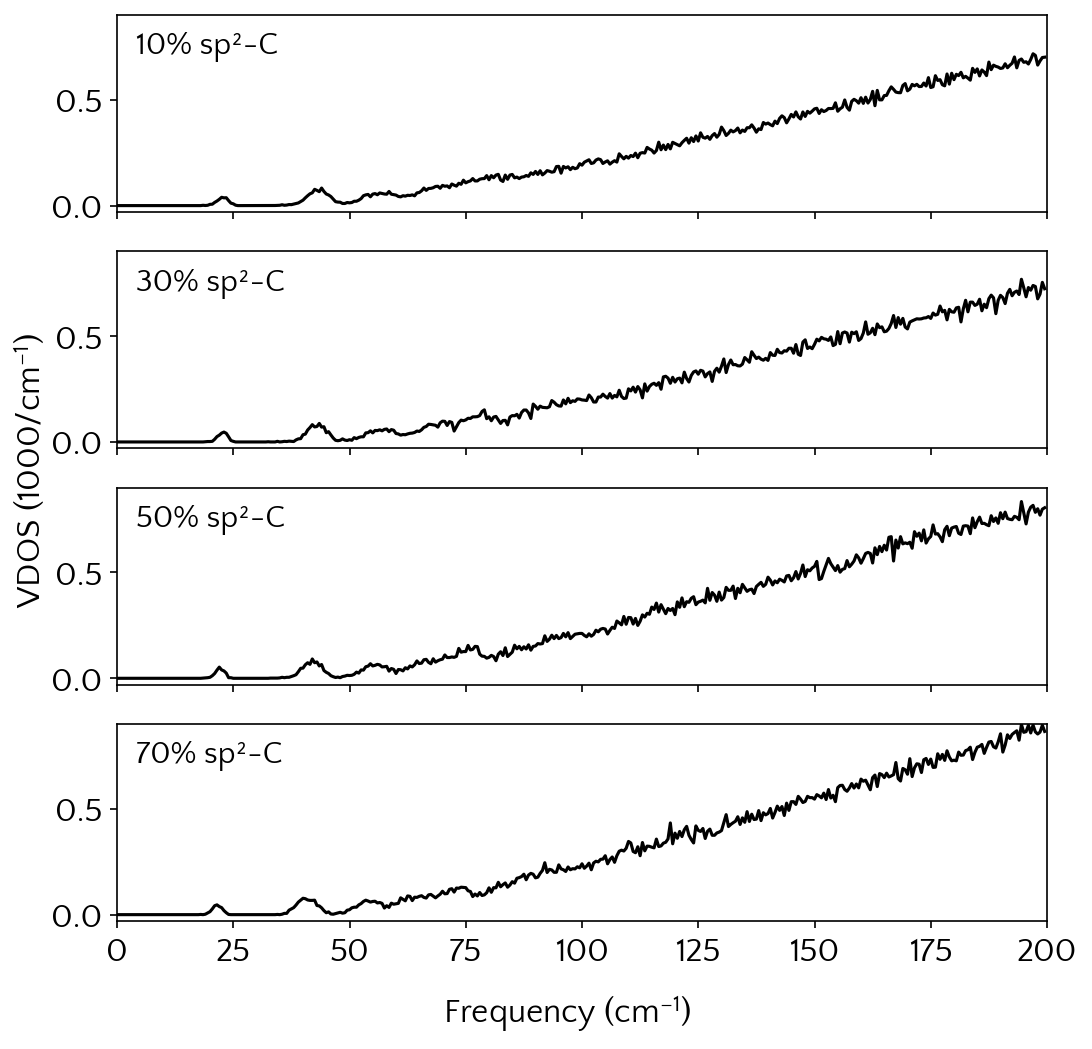

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(8, 8),dpi=150)
folders = ['10_90','30_70','50_50','70_30']
texts = ['10% sp²-C','30% sp²-C','50% sp²-C','70% sp²-C']
top_y = 0.9
for n,folder in enumerate(folders):
    ax[n].plot(f,5e3*DOS[n], label=folder, color='k')
    ax[n].set_xlim(0,max_freq)
    ax[n].set_ylim(-0.03,top_y)
    ax[n].text(0.02, 0.92, texts[n], verticalalignment='top', horizontalalignment='left',
               transform=ax[n].transAxes, color='black', fontsize=15)

fig.text(0.5, 0.04, 'Frequency (cm$^{-1}$)', ha='center')
fig.text(0.04, 0.5, 'VDOS (1000/cm$^{-1}$)', va='center', rotation='vertical')
plt.savefig('panel_VDOS.pdf')
plt.show()